In [4]:
import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [5]:
data = pd.read_csv('cleaned_train.csv')

In [6]:
colns = data.columns
cat_colns = []
num_colns = []
for i in range(0,len(colns)):
    if (data[colns[i]].dtype == object):
        cat_colns.append(colns[i])
    else:
        if colns[i] != 'SalePrice':
            num_colns.append(colns[i])
#     print("Data type of",colns[i],"is",data[colns[i]].dtype)
# print("="*125,"\n")
print("The categoric variables are:\n")
print(len(cat_colns),"\n")
print("="*125,"\n")
print("The numeric variables are:\n")
print(len(num_colns),"\n")

The categoric variables are:

43 


The numeric variables are:

37 



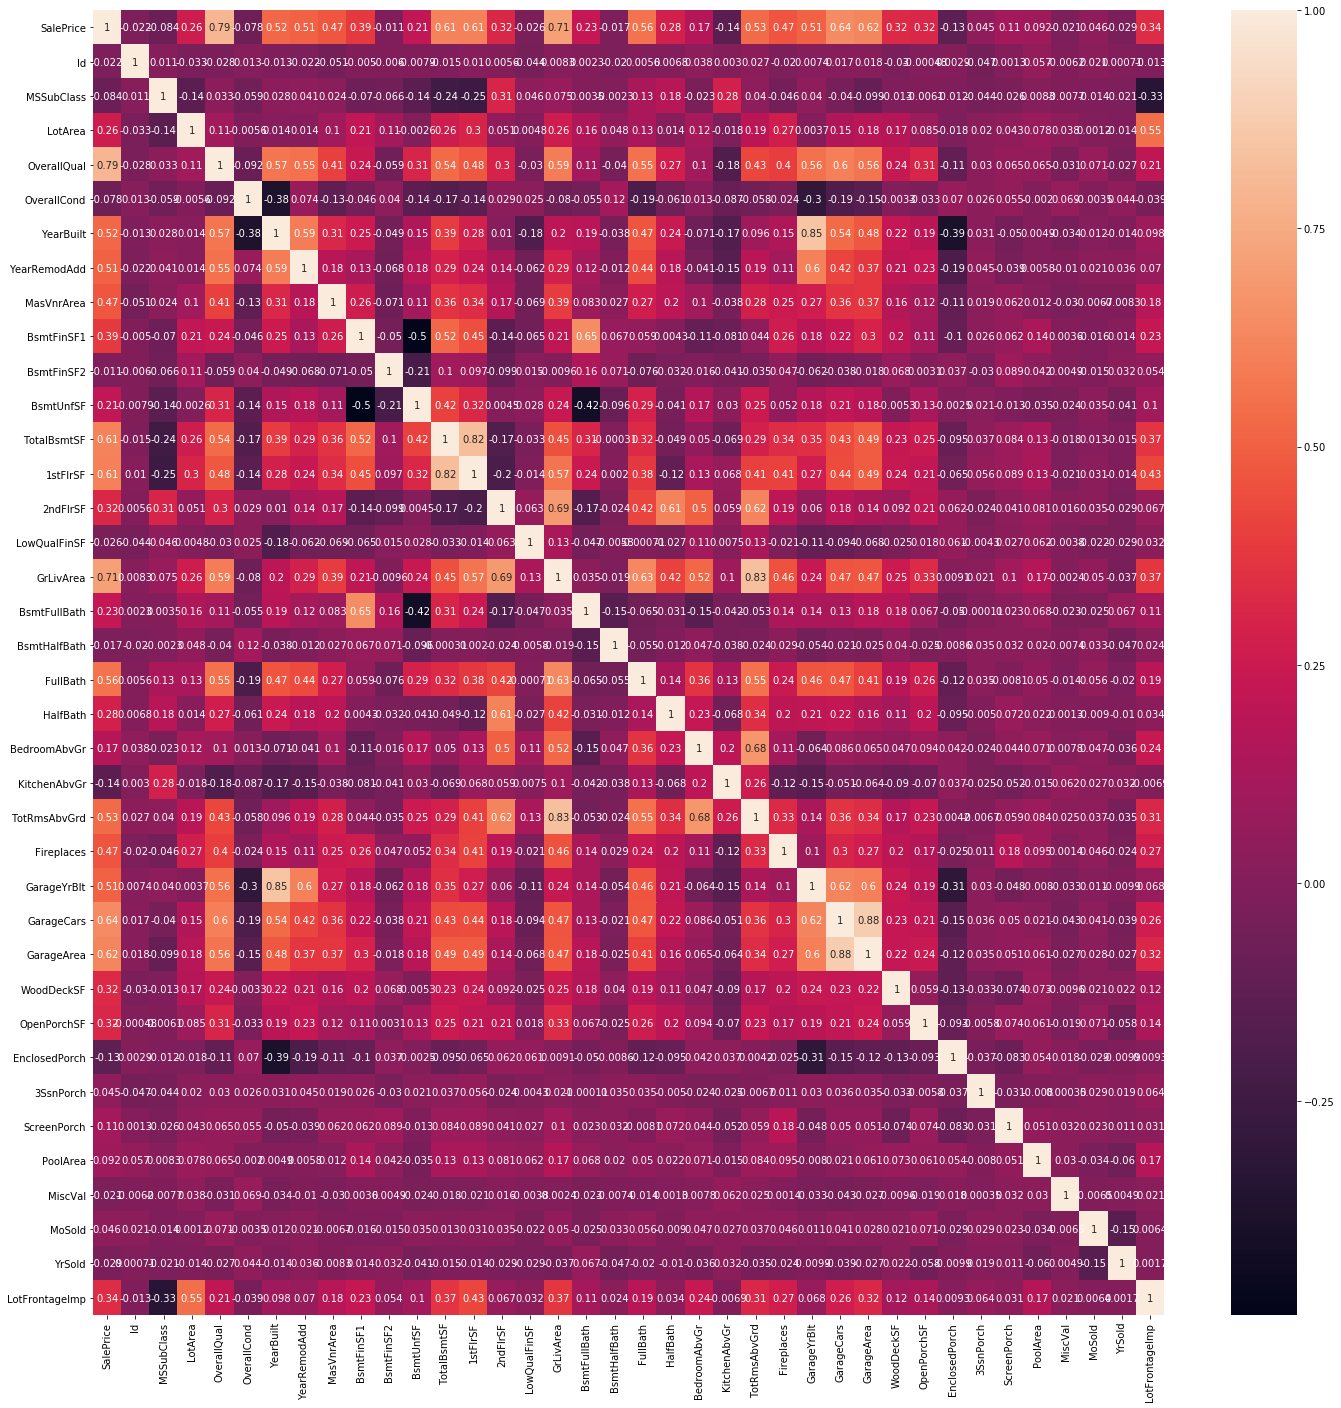

In [4]:
cor_colns = ['SalePrice'] + num_colns
corr = (data[cor_colns].corr())
fig, ax = plt.subplots(figsize=(24,24))
sn.heatmap(corr, annot=True, ax = ax)
plt.show()
# corr

In [5]:
imp_num_colns =[]
for col in num_colns:
    if abs(data.SalePrice.corr(data[col])) > 0.3:
            imp_num_colns.append(col)
#             plt.scatter(data[col],data.SalePrice,alpha=.5,c='k')
#             plt.title(col+" "+str(data.SalePrice.corr(data[col])))
#             plt.xlabel(col)
#             plt.ylabel("SalePrice")
#             plt.show()
#             input("Hit Enter to continue")
print(imp_num_colns)
len(imp_num_colns)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'LotFrontageImp']


18

In [6]:
imp_cat_colns = []
df = data.loc[data.SalePrice<300000].reset_index(drop=True)
for col in cat_colns:
    maxP = df[[col,'SalePrice']].groupby(col).mean().max()['SalePrice']
    minP = df[[col,'SalePrice']].groupby(col).mean().min()['SalePrice']
    if(maxP - minP) > 75000:
        imp_cat_colns.append(col)
#         df.boxplot(column='SalePrice',by=col,grid=False,figsize=(12,6))
#         plt.title(str(maxP-minP),fontsize=20)
#         plt.xlabel(col,fontsize=12,rotation=45)
#         plt.ylabel('SalePrice',fontsize=12)
#         plt.show()
#         input("Hit Enter to continue")
print(imp_cat_colns)
len(imp_cat_colns)
# df.to_csv(r'D:\SS\Analytics\Python\Python material\case-full\before_enc.csv')
#### In this output, there are three additional columns compared to R output. This is because, the SalePrice difference
#### between the NA values and other values in columns BsmtFintype1, BsmtExposure and GarageQual is greater than 75000

['MSZoning', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'MiscFeature', 'SaleType', 'SaleCondition']


28

In [7]:
# dff = df.loc[:,imp_cat_colns].reset_index(drop=True)
dff = data.loc[:,imp_cat_colns].reset_index(drop=True)

enc = OneHotEncoder(handle_unknown='error',drop='first',sparse=False)

for col in imp_cat_colns:
    addn_colns = pd.DataFrame(enc.fit_transform(dff[[col]]))
    addn_colns.columns = enc.get_feature_names([col])
    dff.drop(col, axis=1, inplace=True)
    dff= pd.concat([dff, addn_colns], axis=1)
dff.columns

#### The 3 additional columns described in the last output yield, 4+6+5 = 15 additional dummy variables 

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=180)

In [8]:
# dff['SalePrice']=df.loc[df.SalePrice < 300000,'SalePrice'].reset_index(drop=True)
dff['SalePrice']=data.SalePrice
# dff.to_csv(r'D:\SS\Analytics\Python\Python material\case-full\after_enc.csv')
# dff.shape[0]

In [9]:
#### Here is where things go for a toss. The number of columns in this output is way higher than that in R

imp_cat_colns = []

for col in list(dff.columns):
    ones = dff.loc[dff[col]==1,'SalePrice'].mean()
    zrs = dff.loc[dff[col]==0,'SalePrice'].mean()
    diff = ones - zrs
    if abs(diff)>40000:
        imp_cat_colns.append(col)
#     maxP = df[[col,'SalePrice']].groupby(col).mean().max()['SalePrice']
#     minP = df[[col,'SalePrice']].groupby(col).mean().min()['SalePrice']
#     if(maxP - minP) > 40000:
#         imp_cat_colns.append(col)

#         dff.boxplot(column='SalePrice',by=col,grid=False,figsize=(10,6))
#         plt.title(str(maxP-minP),fontsize=15)
#         plt.xlabel(col,fontsize=12,rotation=45)
#         plt.ylabel('SalePrice',fontsize=12)
#         plt.show()
#         input("Hit Enter to continue")
print(imp_cat_colns)
len(imp_cat_colns)

['MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_NAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_PosA', 'Condition1_RRAe', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_1.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Roll', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_VinylSd', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CBlock', 'Exter

108

In [10]:
# imp_colns = []
# imp_colns.extend(imp_num_colns)
# imp_colns.extend(imp_cat_colns)
# imp_colns.append('SalePrice')
# imp_colns
ready_data = dff.loc[:,imp_cat_colns]
ready_data['SalePrice'] = dff['SalePrice']
ready_data = pd.concat([data[imp_num_colns], ready_data], axis=1)
print(ready_data.shape[0])

1460


In [12]:
ready_data.to_csv('ready_data2.csv',index=False)